In [297]:
import numpy as np
import pandas as pd
#read data
data = pd.read_csv("data.csv")
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [299]:
#lambdas function
from bs4 import BeautifulSoup
import re
formatXML = lambda x : BeautifulSoup(x, "lxml").text
replaceDividend = lambda x :re.sub(r'\|\|\|', r' ', x) 
formatUrl = lambda x : str(re.sub(r'http\S+', r'<url>',x.encode('utf-8')))
removeExtraSpace = lambda x : re.sub(' +', ' ', x).lower()

In [300]:
data.posts = data.posts.apply(formatXML)

In [301]:
data.posts = data.posts.apply(replaceDividend)

In [302]:
data.posts = data.posts.apply(formatUrl)

In [303]:
data.posts = data.posts.apply(removeExtraSpace)

In [304]:
data_nb = data.copy(deep=True)

In [305]:
#remove numbers from the posts
data.posts = data.posts.str.replace('\d+','')

In [306]:
#Need to remove panctuations and stop words
#data.to_csv("cleanData.csv")
data.shape

(8675, 2)

In [307]:
from nltk import word_tokenize
import string
#remove pantuations including emoji as of now 
removePuntuation = lambda x : ''.join([i for i in x if i not in string.punctuation])

In [308]:
data['posts']=data['posts'].apply(removePuntuation)

In [309]:
chageTolower = lambda x: x.lower()

In [310]:
data['posts']=data['posts'].apply(chageTolower)

In [311]:
data['posts'] = data['posts'].apply(lambda x : x.strip())

In [312]:
#Applying Lemmatizer
from nltk.stem import PorterStemmer, WordNetLemmatizer

stemmer = PorterStemmer()
lemmatiser = WordNetLemmatizer()

In [313]:
lemmatiseText = lambda x : ' '.join([lemmatiser.lemmatize(w.decode('utf-8')) for w in x.split(' ')]) 

In [314]:
data['posts'] = data['posts'].apply(lemmatiseText)

In [315]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfTransformer

In [316]:
#unigram model definaion
np.random.seed(1)
countvec = CountVectorizer(ngram_range=(1, 1), 
                         stop_words='english',
                         lowercase = True, 
                         max_features = 5000)




    

In [317]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

 The accuracy score of Multinomial Naive Bayes using unigram is :  0.569093055086


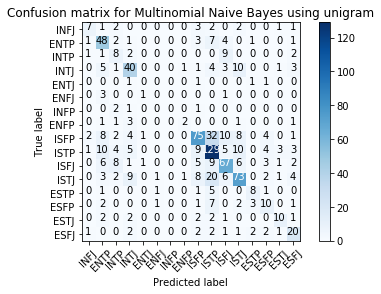

The accuracy score of Multinomial Logistic Regression using unigram is :  0.674338272641


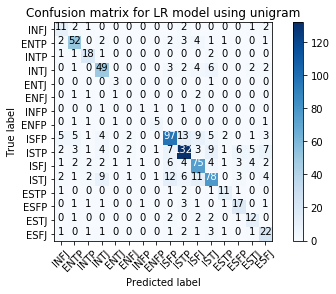

The accuracy score of Multinomial Naive Bayes using tfidf is :  0.294822626924


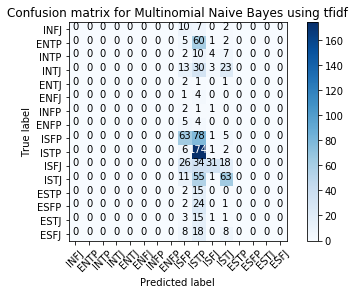

The accuracy score of Multinomial Logistic Regression using tfidf is :  0.117546963288


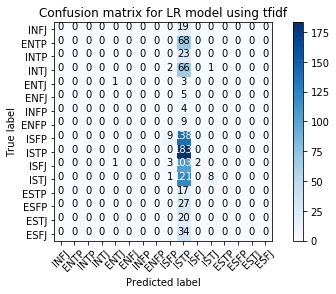

In [383]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix,roc_curve, auc,classification_report, f1_score

import matplotlib.pyplot as plt
kf = StratifiedShuffleSplit(n_splits=1)
mlb=MultinomialNB()
lr = LogisticRegression(class_weight="balanced", C=0.005)



for train, test in kf.split(data['posts'],data['type']):
    
    X_train, X_test, y_train, y_test = data['posts'][train], data['posts'][test], data['type'][train], data['type'][test]
    
    #creating count vector
    X_train_cnt = countvec.fit_transform(X_train)
    X_test_cnt = countvec.transform(X_test)
    
    
    #Multinomial NaiveBayes Using countvcector
    mlb.fit(X_train_cnt, y_train)
    
    preds = mlb.predict(X_test_cnt)
    score_1 = f1_score(y_test, preds, average='weighted')
    print 'The accuracy score of Multinomial Naive Bayes using unigram is : ',score_1
    
    cnf_matrix = confusion_matrix(y_test, preds)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    
    plot_confusion_matrix(cnf_matrix, classes=labels_arr,
                          title='Confusion matrix for Multinomial Naive Bayes using unigram')
    
    #Logistic Regression Model Using countvcector
    lr.fit(X_train_cnt, y_train)
    preds = lr.predict(X_test_cnt)
    score_2 = f1_score(y_test, preds, average='weighted')
    
    print 'The accuracy score of Multinomial Logistic Regression using unigram is : ',score_2
    
    cnf_matrix = confusion_matrix(y_test, preds)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    
    plot_confusion_matrix(cnf_matrix, classes=labels_arr,
                          title='Confusion matrix for LR model using unigram')
    
    #tfidf Vectorizer
    X_train_tfidf = vectorizer.fit_transform(X_train_cnt)
    X_test_tfidf = vectorizer.transform(X_test_cnt)

    X_train =X_train_tfidf.todense()
    X_test = X_test_tfidf.todense()
    
    
    mlb.fit(X_train, y_train)
    
    preds = mlb.predict(X_test)
    score_3 = f1_score(y_test, preds, average='weighted')
    print 'The accuracy score of Multinomial Naive Bayes using tfidf is : ',score_3
    
    cnf_matrix = confusion_matrix(y_test, preds)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    
    plot_confusion_matrix(cnf_matrix, classes=labels_arr,
                          title='Confusion matrix for Multinomial Naive Bayes using tfidf')
    lr.fit(X_train, y_train)
    preds = lr.predict(X_test)
    score_4 = f1_score(y_test, preds, average='weighted')
    
    print 'The accuracy score of Multinomial Logistic Regression using tfidf is : ',score_4
    
    cnf_matrix = confusion_matrix(y_test, preds)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    
    plot_confusion_matrix(cnf_matrix, classes=labels_arr,
                          title='Confusion matrix for LR model using tfidf')


In [330]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import gensim
import os
import collections
import smart_open
import random


,type,posts
0,INFJ,url url enfp and intj moment url sportscenter ...
1,ENTP,im finding the lack of me in these post very a...
2,INTP,good one url of course to which i say i know ...
3,INTJ,dear intp i enjoyed our conversation the other...
4,ENTJ,youre fired thats another silly misconception ...


In [361]:
def read_corpus(fname, tokens_only=False):
    with smart_open.smart_open(fname, encoding="iso-8859-1") as f:
        for i, line in enumerate(f):
            if tokens_only:
                yield gensim.utils.simple_preprocess(line)
            else:
                # For training data, add tags
                if i==0:
                    pass
                else:
                    yield gensim.models.doc2vec.TaggedDocument(gensim.utils.simple_preprocess(line)[1:], 
                                                                                 gensim.utils.simple_preprocess(line)[0]) # tag is first item, the rest is text
                    
                    

In [362]:
all_data = list(read_corpus('data.csv'))
total_num_obs = len(all_data)


In [363]:
from math import floor, ceil
train_corpus = all_data[0:int(floor(3*total_num_obs/4))]
test_corpus = all_data[int(floor(3*total_num_obs/4)):]

In [364]:
model = gensim.models.doc2vec.Doc2Vec(size=100, min_count=2, iter=55)
model.build_vocab(train_corpus)
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.iter)

327559907

In [365]:
train_targets, train_regressors = zip(*[(doc.words, doc.tags) for doc in train_corpus])
test_targets, test_regressors = zip(*[(doc.words, doc.tags) for doc in test_corpus])

In [366]:
train_regressors = list(train_regressors)
test_regressors = list(test_regressors)

In [367]:
X = []
for i in range(len(train_targets)):
    X.append(model.infer_vector(train_targets[i]))
train_x = abs(np.asarray(X))

In [368]:
X = []
for i in range(len(test_targets)):
    X.append(model.infer_vector(test_targets[i]))
test_x = abs(np.asarray(X))
print test_x.shape

(2169, 100)


The accuracy of Multinomial Naive Bayes using doc2vec is :  0.299190113983


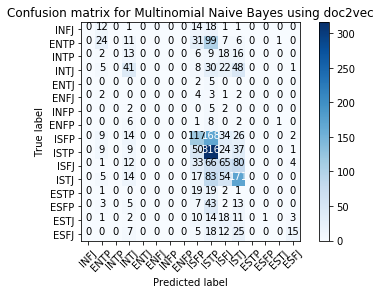

The accuracy of Logistic Regression using doc2vec is :  0.331489165514


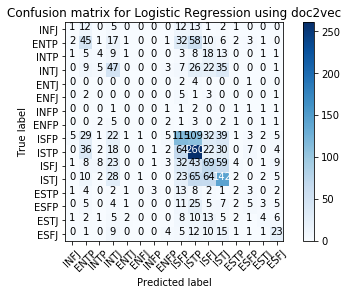

In [381]:
mlb=MultinomialNB(alpha=0.1) 
lr = LogisticRegression(class_weight="balanced", C=0.005,multi_class='ovr') 


mlb.fit(train_x, train_regressors)
preds = mlb.predict(test_x)
score_5 = f1_score(test_regressors, preds, average='weighted') 
print 'The accuracy of Multinomial Naive Bayes using doc2vec is : ',score

cnf_matrix = confusion_matrix(test_regressors, preds)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix

plot_confusion_matrix(cnf_matrix, classes=labels_arr,title='Confusion matrix for Multinomial Naive Bayes using doc2vec')

from sklearn import linear_model
logreg = linear_model.LogisticRegression(multi_class='ovr')
logreg.fit(train_x, train_regressors)
preds = logreg.predict(test_x)
preds = np.array(preds)

sumval =0.0
for i in range(len(preds)):
    if preds[i] == test_regressors[i]:
        sumval +=1
score_6=float(sumval/len(test_regressors))
print 'The accuracy of Logistic Regression using doc2vec is : ',score_6

cnf_matrix = confusion_matrix(test_regressors, preds)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix

plot_confusion_matrix(cnf_matrix, classes=labels_arr,title='Confusion matrix for Logistic Regression using doc2vec')

In [402]:
#Import libraries for svm
from sklearn.multiclass import OutputCodeClassifier
from sklearn.svm import LinearSVC

In [414]:
#SVM using unigram
clf = OutputCodeClassifier(LinearSVC(random_state=0),code_size=2, random_state=0)
predict = clf.fit(X_train_cnt.toarray(), y_train).predict(X_test_cnt.toarray())


The accuracies of Support Vector Machine using unigram is :  0.496543778802


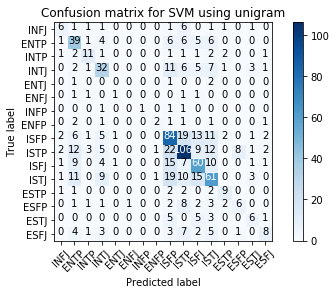

In [415]:
test_target = list(y_test)

sumval =0.0
for i in range(len(predict)):
    if predict[i] == test_target[i]:
        sumval +=1
score_7 =float(sumval/len(test_target))
print 'The accuracies of Support Vector Machine using unigram is : ',score_7
cnf_matrix = confusion_matrix(test_target, predict)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix

plot_confusion_matrix(cnf_matrix, classes=labels_arr,title='Confusion matrix for SVM using unigram')

In [416]:
#SVM using tf-idf
clf = OutputCodeClassifier(LinearSVC(random_state=0),code_size=2, random_state=0)
predict = clf.fit(X_train, y_train).predict(X_test)


The accuracies of Support Vector Machine using tf-idf is :  0.619815668203


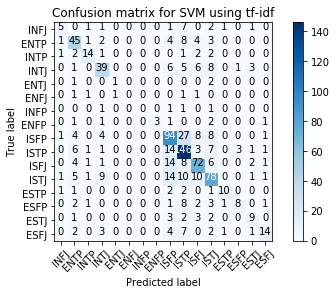

In [417]:

test_target = list(y_test)

sumval =0.0
for i in range(len(predict)):
    if predict[i] == test_target[i]:
        sumval +=1
score_8 =float(sumval/len(test_target))
print 'The accuracies of Support Vector Machine using tf-idf is : ',score_8
cnf_matrix = confusion_matrix(test_target, predict)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix

plot_confusion_matrix(cnf_matrix, classes=labels_arr,title='Confusion matrix for SVM using tf-idf')

In [418]:
clf = OutputCodeClassifier(LinearSVC(random_state=0),code_size=2, random_state=0)
predict = clf.fit(train_x, train_regressors).predict(test_x)

The accuracies of Support Vector Machine using doc2vec is :  0.319963116644


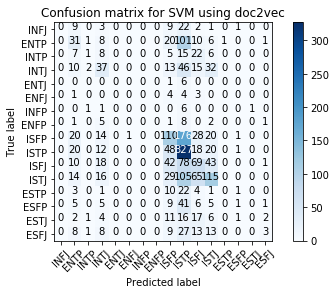

In [419]:
test_target = list(test_regressors)
sumval =0.0
for i in range(len(predict)):
    if predict[i] == test_target[i]:
        sumval +=1
score_9 =float(sumval/len(test_target))
print 'The accuracies of Support Vector Machine using doc2vec is : ',score_9
cnf_matrix = confusion_matrix(test_target, predict)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix

plot_confusion_matrix(cnf_matrix, classes=labels_arr,title='Confusion matrix for SVM using doc2vec')

In [420]:
raw_data = {'Model': ['Multinomial Naive Bayes', 'Logistic Regression','SVM'],
        'Unigram': [score_1*100,score_2*100,score_7*100],
        'tfidf': [score_3*100,score_4*100,score_8*100],
        'doc2vec': [score_5*100,score_6*100,score_9*100]}
df = pd.DataFrame(raw_data, columns = ['Model', 'Unigram', 'tfidf', 'doc2vec'])
df

,Model,Unigram,tfidf,doc2vec
0,Multinomial Naive Bayes,56.909306,29.482263,29.919011
1,Logistic Regression,67.433827,11.754696,33.148917
2,SVM,49.654378,61.981567,31.996312


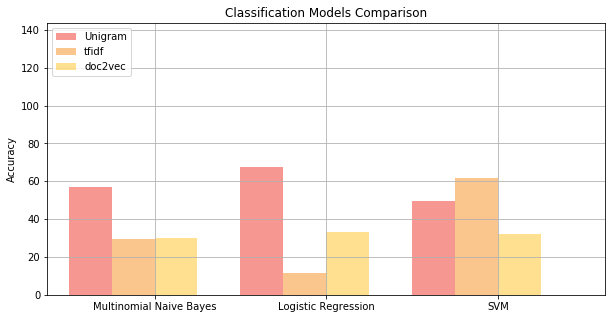

In [421]:
pos = list(range(len(df['Unigram']))) 
width = 0.25 

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))


plt.bar(pos, 
        
        df['Unigram'], 
        width, 
        alpha=0.5, 
        color='#EE3224', 
        label=df['Model'][0]) 


plt.bar([p + width for p in pos], 
        
        df['tfidf'],
        width, 
        alpha=0.5, 
        color='#F78F1E', 
        label=df['Model'][1]) 


plt.bar([p + width*2 for p in pos], 
        df['doc2vec'], 
        width, 
        alpha=0.5, 
        color='#FFC222', 
        label=df['Model'][2]) 




ax.set_ylabel('Accuracy')


ax.set_title('Classification Models Comparison')


ax.set_xticks([p + 1.5 * width for p in pos])


ax.set_xticklabels(df['Model'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df['Unigram'] + df['tfidf'] + df['doc2vec'])] )

# Adding the legend and showing the plot
plt.legend(['Unigram', 'tfidf', 'doc2vec'], loc='upper left')
plt.grid()
plt.show()